In [1]:
import pickle
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam,RMSprop
from keras.models import Model

In [9]:
with open("pickle_data/images.p","rb") as f:
  images = pickle.load(f)

with open("pickle_data/labels.p","rb") as f:
  labels = pickle.load(f)

In [10]:
print(images.shape)
print(labels.shape)
print(set(labels))

(594, 100, 100)
(594,)
{'Durga', 'sambit', 'Malay', 'Bijay-ID-1000', 'Arnab', 'Ashutosh'}


In [11]:
le = LabelEncoder()
labels = le.fit_transform(labels)

In [12]:
print(set(labels))

{0, 1, 2, 3, 4, 5}


In [13]:
n_classes = len(set(labels))
label_mapping = le.inverse_transform(np.arange(n_classes))
print(label_mapping)

['Arnab' 'Ashutosh' 'Bijay-ID-1000' 'Durga' 'Malay' 'sambit']


In [14]:
for i in range(n_classes):
  print("person {} is {}".format(i,le.inverse_transform([i])))

person 0 is ['Arnab']
person 1 is ['Ashutosh']
person 2 is ['Bijay-ID-1000']
person 3 is ['Durga']
person 4 is ['Malay']
person 5 is ['sambit']


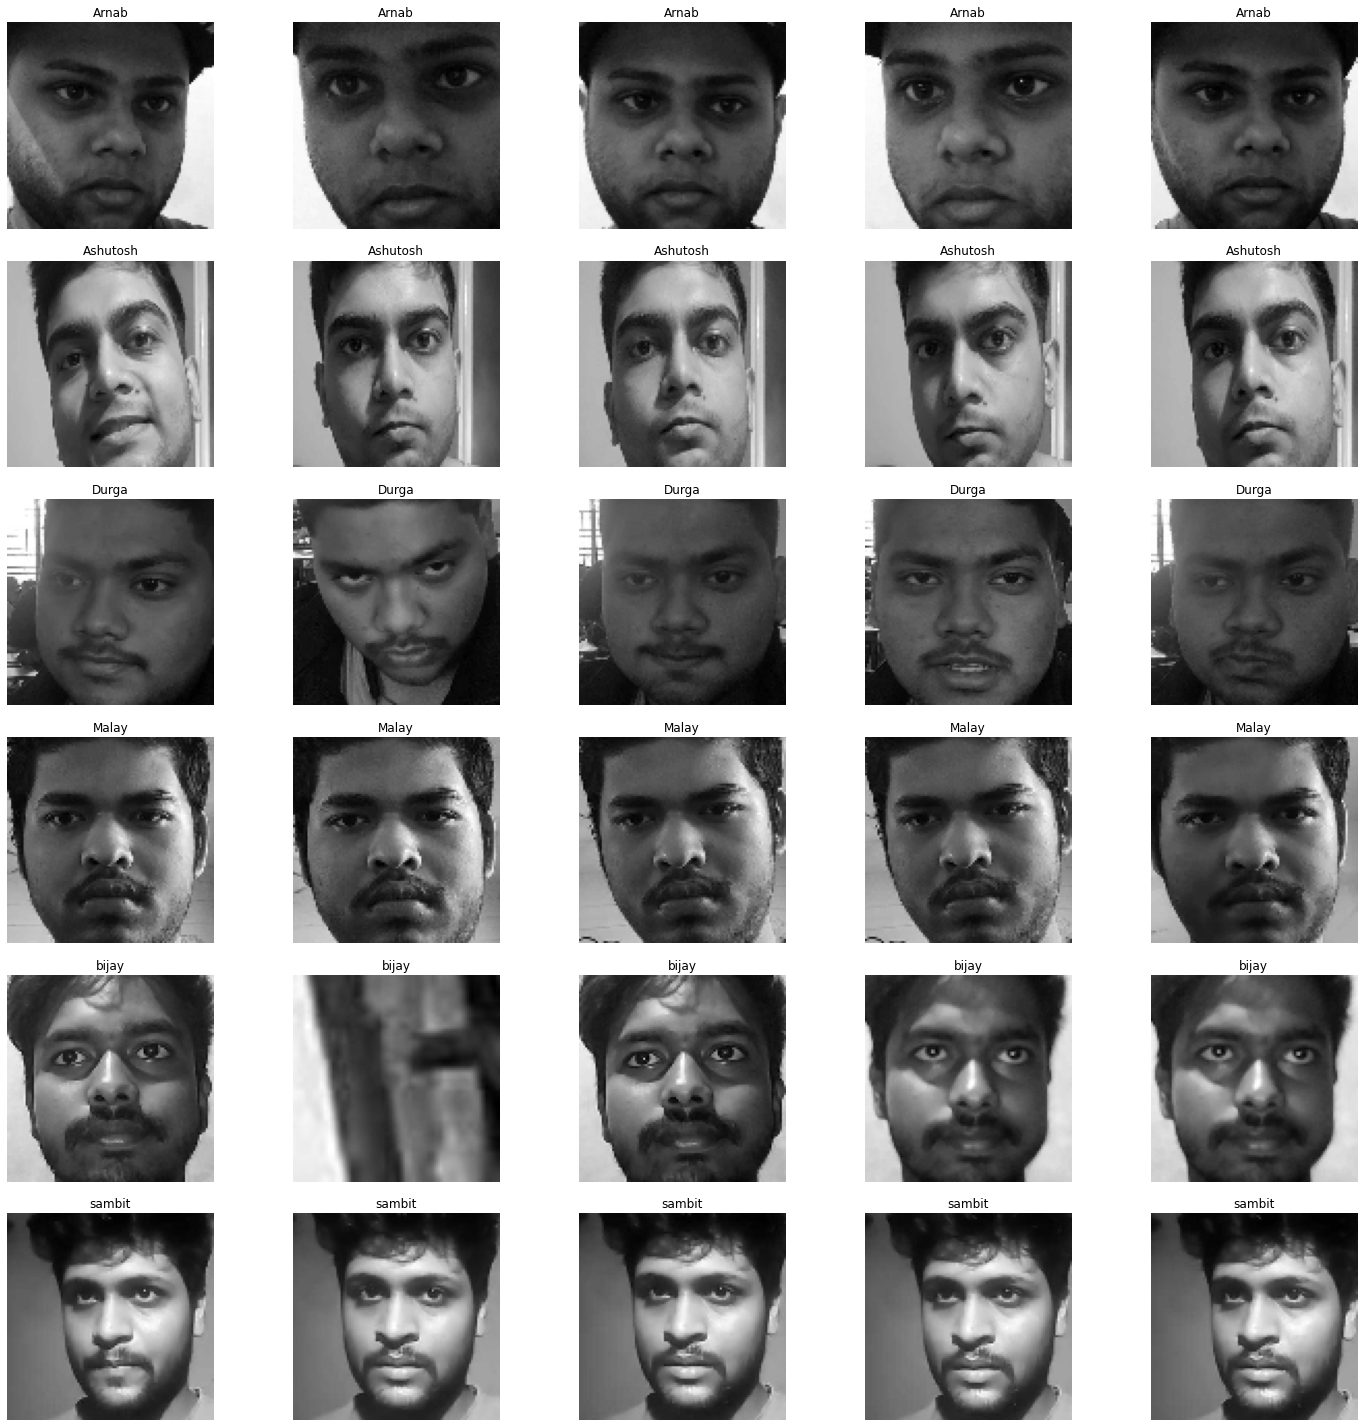

In [10]:
fig,axes = plt.subplots(nrows=n_classes,ncols=5,figsize=(20,20))
fig.tight_layout()

for i in range(n_classes):

  for j in range(5): 
    axes [i][j].imshow(images[labels==i][np.random.randint(0,len(images[labels==i]))],cmap="gray")
    axes[i][j].axis("off")
    axes[i][j].set_title(label_mapping[i])

In [11]:
def preprocess(img):
  img = img.reshape(100,100,1)
  img = img/255
  return img

In [12]:
images = np.array(list(map(preprocess,images)))

In [13]:
print(images.shape)

(594, 100, 100, 1)


In [14]:
xtr,xts,ytr,yts = train_test_split(images,labels,test_size=0.1,random_state=0)

In [15]:
ytr = to_categorical(ytr,n_classes)
yts = to_categorical(yts,n_classes)

In [16]:
model = Sequential()
model.add(Conv2D(32,(5,5),input_shape=(100,100,1),strides=2,activation="relu"))
model.add(Conv2D(32,(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dense(216,activation="relu"))
model.add(Dense(n_classes,activation="softmax"))
model.compile(RMSprop(learning_rate=1e-4),loss=["categorical_crossentropy"],metrics = ["accuracy"])

In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                    

In [19]:
model.fit(xtr,ytr,epochs=25,verbose=1,validation_data=(xts,yts))

Epoch 1/25
17/17 [==============================] - 8s 407ms/step - loss: 1.5462 - accuracy: 0.3989 - val_loss: 1.1366 - val_accuracy: 0.4167
Epoch 2/25
17/17 [==============================] - 6s 364ms/step - loss: 0.7635 - accuracy: 0.7715 - val_loss: 0.3812 - val_accuracy: 0.9500
Epoch 3/25
17/17 [==============================] - 6s 347ms/step - loss: 0.2741 - accuracy: 0.9494 - val_loss: 0.1016 - val_accuracy: 1.0000
Epoch 4/25
17/17 [==============================] - 6s 360ms/step - loss: 0.1150 - accuracy: 0.9813 - val_loss: 0.0647 - val_accuracy: 1.0000
Epoch 5/25
17/17 [==============================] - 6s 355ms/step - loss: 0.0767 - accuracy: 0.9813 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 6/25
17/17 [==============================] - 6s 343ms/step - loss: 0.0843 - accuracy: 0.9850 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 7/25
17/17 [==============================] - 6s 338ms/step - loss: 0.0904 - accuracy: 0.9738 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 

In [20]:
layer0 = Model(model.layers[0].input,model.layers[0].output)

In [21]:
features = layer0.predict(xts[0].reshape(1,100,100,1))

1/1 [==============================] - 0s 123ms/step


In [22]:
features.shape

(1, 48, 48, 32)

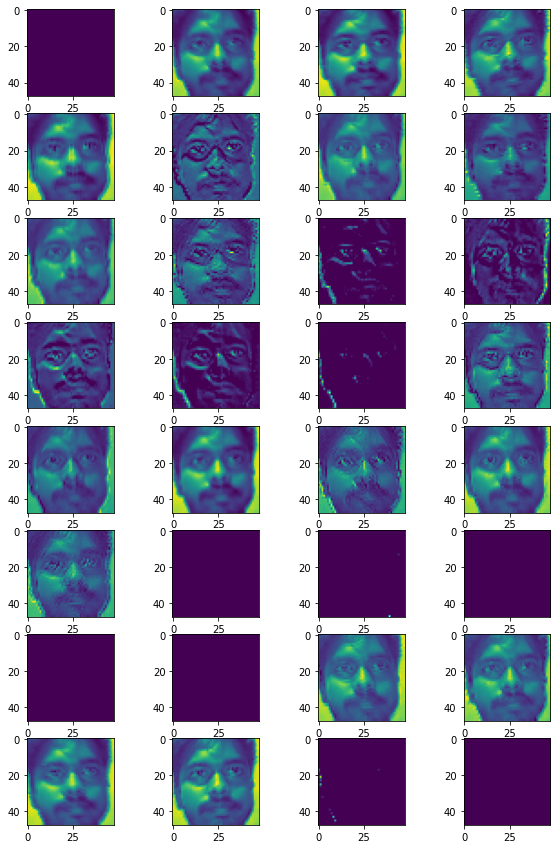

In [23]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8,4,i+1)
  plt.imshow(features[0,:,:,i])

In [31]:
model.save("FACE-DETECT.h5")